In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

## Segment 1: Eigendecomposition

### Affine Transformation via Matrix Application

<font color=red>Applying</font> a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

Let's say we have a vector $v$:

In [3]:
v = np.array([3, 1])
v

array([3, 1])

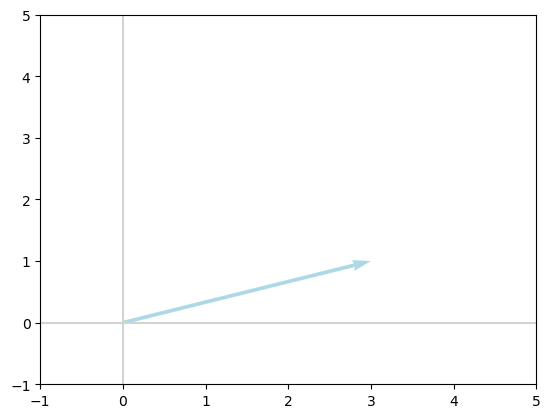

In [4]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

consider this matrix (let's call it $E$) that flips vectors over the $x$-axis: 

In [5]:
E = np.array([[1, 0], [0, -1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [6]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

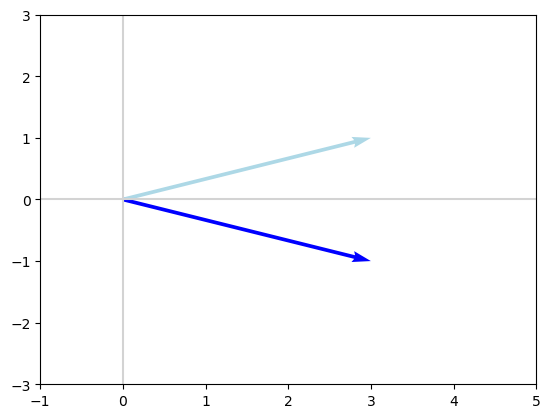

In [7]:
plot_vectors([v, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix, $F$, which flips vectors over the $y$-axis: 

In [8]:
F = np.array([[-1, 0], [0, 1]])
F 

array([[-1,  0],
       [ 0,  1]])

In [9]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

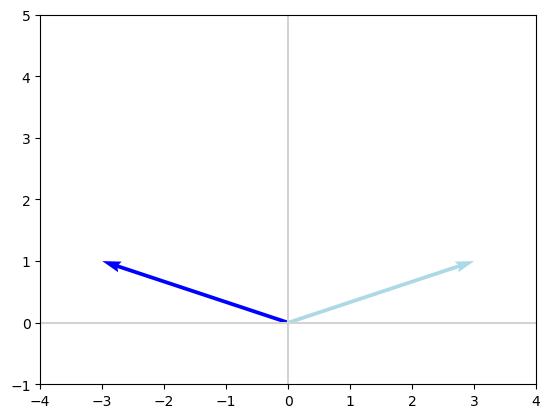

In [10]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* 
* *Rotation* 

A single matrix can apply multiple affine transforms **simultaneously** ( e.g. flip over an axis and rotate 45$^{\circ}$). 

As an example, let's see what happens when we apply this matrix $A$ to the vector $v$: 

In [11]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [12]:
Av = np.dot(A, v)
Av

array([1, 4])

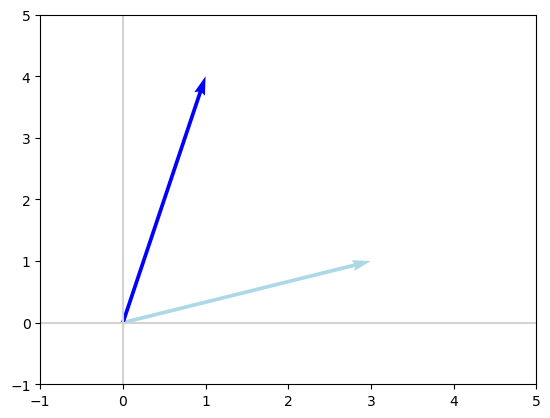

In [13]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

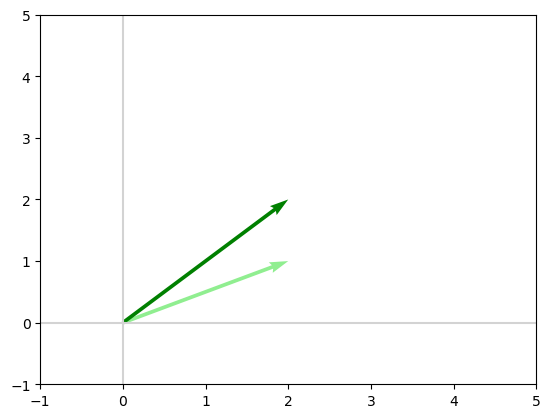

In [14]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector): 

In [15]:
v

array([3, 1])

In [16]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [17]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [18]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [19]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [20]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

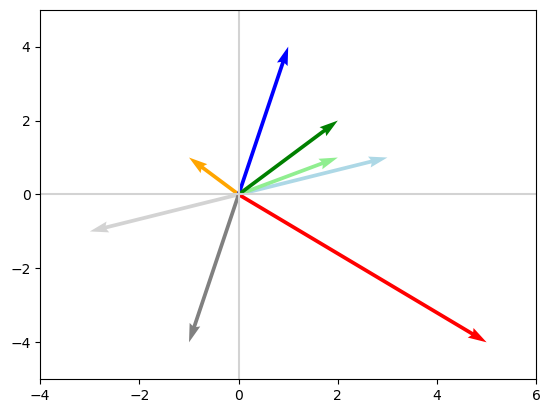

In [21]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

### Eigenvectors and Eigenvalues

An <font color=red>eigenvector</font> (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An <font color=blue>eigenvalue</font> is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

In [22]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically, however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [23]:
lambdas, V = np.linalg.eig(A) 

In [24]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

In [25]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [26]:
v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [27]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [28]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [29]:
lambduh * v

array([1.18031462, 0.70000958])

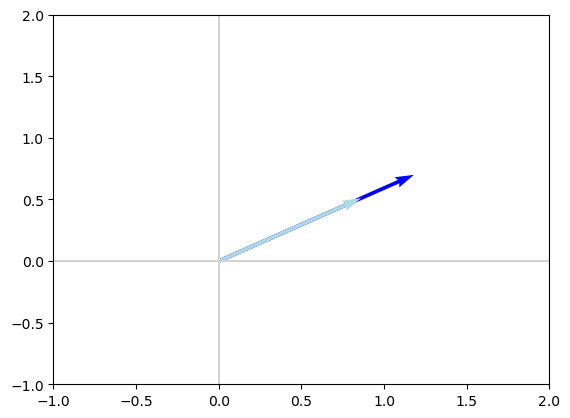

In [30]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

In [31]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [32]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [33]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [34]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

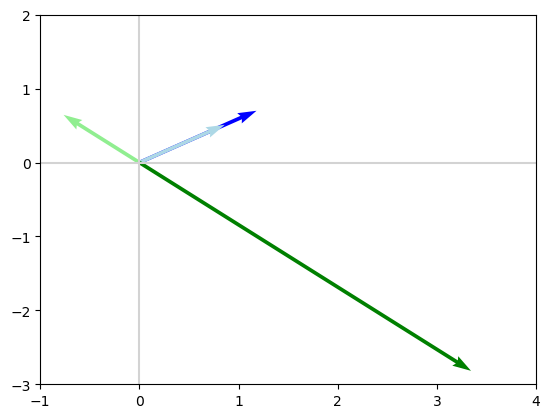

In [35]:
plot_vectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using the PyTorch `eig()` method, we can do exactly the same: 

In [36]:
A

array([[-1,  4],
       [ 2, -2]])

In [37]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [38]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [39]:
V_cplx # complex-typed values with "0.j" imaginary part are in fact real numbers

tensor([[ 0.8601+0.j, -0.7645+0.j],
        [ 0.5101+0.j,  0.6446+0.j]])

In [40]:
V_p = V_cplx.float()
V_p

/var/folders/xg/12vsx3q14nlbyywhl5xczhkw0000gn/T/ipykernel_18270/1096125134.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525473998/work/aten/src/ATen/native/Copy.cpp:250.)
  V_p = V_cplx.float()


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [41]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [42]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [43]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [44]:
lambda_p = lambdas_p[0]
lambda_p

tensor(1.3723)

In [45]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [46]:
lambda_p * v_p

tensor([1.1803, 0.7000])

### Matrix Determinants

* Map square matrix to scalar
* for matrix **X**, denoted as $det$(**X**)
* If $det$(**X**)$=0$
    * Matrix $X^-1$ can't be computed
    * Matrix **X** is singular: it contains linearly-dependennt columns
* $det$(**X**)= Product of all eigenvalues

In [47]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [48]:
np.linalg.det(X)

-2.0000000000000013

In [49]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [50]:
np.linalg.det(N)

0.0

In [51]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [52]:
np.linalg.det(X)

19.999999999999996

In [53]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [54]:
np.product(lambdas)

20.000000000000007

In [55]:
X = torch.tensor([[1, 2, 4], [2, -1, 3], [0, 5, 1.]]) # must use float not int
X

tensor([[ 1.,  2.,  4.],
        [ 2., -1.,  3.],
        [ 0.,  5.,  1.]])

In [56]:
torch.det(X) 

tensor(20.)

$|\text{det}(X)|$ quantifies volume change as a result of applying X:
* If $\text{det}(X) = 0$ then X collapses space completely in at least one dimension, thereby eliminating all volume
* If  $ 0<|\text{det}(X)|<1$ then X contracts volume to some extent
* If $|\text{det}(X)| = 1$ then X preserves volume exactly
* If $|\text{det}(X)|>1$ then X expands volume




Let's use a matrix $B$, which is composed of basis vectors, to explore the impact of applying matrices with varying $|\text{det}(X)|$ values: 

In [57]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

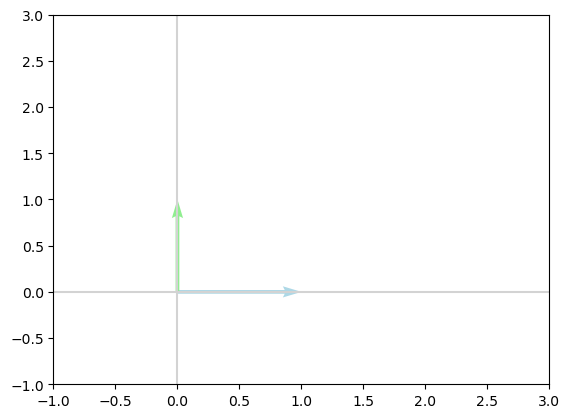

In [58]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [59]:
N

array([[-4,  1],
       [-8,  2]])

In [60]:
np.linalg.det(N)

0.0

In [61]:
NB = np.dot(N, B)
NB

array([[-4,  1],
       [-8,  2]])

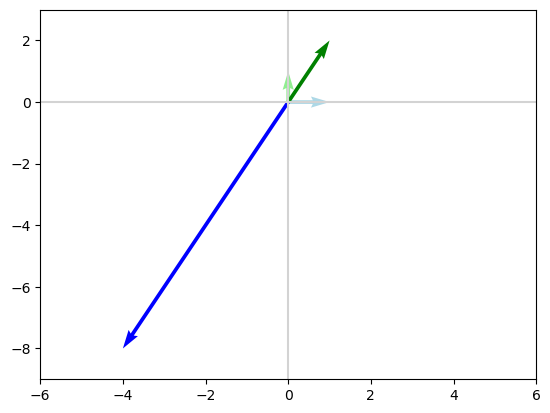

In [62]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [63]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.])

If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero. 

In [64]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [65]:
np.linalg.det(J)

-1.0

In [66]:
np.abs(np.linalg.det(J))

1.0

In [67]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

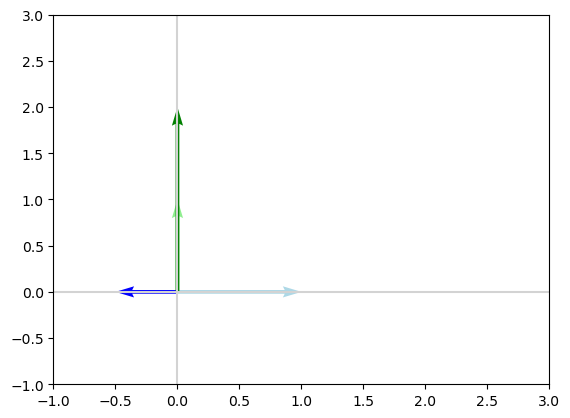

In [68]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [69]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

In [70]:
D = np.array([[2, 0], [0, 2]])
D

array([[2, 0],
       [0, 2]])

In [71]:
np.linalg.det(D)

4.0

In [72]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

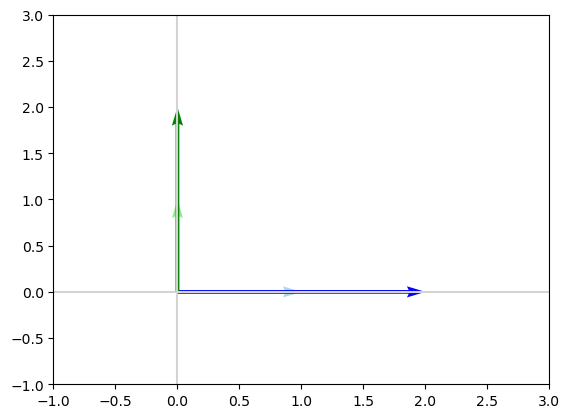

In [73]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [74]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

### Eigendecomposition

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [75]:
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [76]:
lambdas, V = np.linalg.eig(A)

In [77]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [78]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [79]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

Confirm that $A = V \Lambda V^{-1}$: 

In [80]:
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [81]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [82]:
lambdas, Q = np.linalg.eig(A)

In [83]:
lambdas

array([3., 1.])

In [84]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [85]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Let's confirm $A = Q \Lambda Q^T$: 

In [86]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

## Segment 2: Matrix Operations for ML

### Singular Value Decomposition (SVD)

* Unlike egiendecomposition, which is applicable to square matrices only, SVD is applicable to any real-valued maatrix
* Decomposes matrix into:
    * Singular vectors ( analogous to eigenvectors )
    * Singular values ( analogous to eigenvalues )
* For some matrix $A$, its SVD is: 

$A = L\Delta R^T$

Where: 

* $L$ is an orthogonal $n \times n$ matrix; its columns are the **left-singular vectors** of $A$.
* $R$ is an orthogonal $d \times d$ matrix; its columns are the **right-singular vectors** of $A$.
* $\Delta$ is a diagonal $n \times d$ matrix; elements along its diagonal are the **singular values** of $A$.

In [123]:
A = np.array([[-1, 2], [3, -2], [5, 7]])
A

array([[-1,  2],
       [ 3, -2],
       [ 5,  7]])

In [125]:
L, d, RT = np.linalg.svd(A) # R is already transposed

In [126]:
L

array([[ 0.12708324,  0.47409506,  0.87125411],
       [ 0.00164602, -0.87847553,  0.47778451],
       [ 0.99189069, -0.0592843 , -0.11241989]])

In [127]:
RT

array([[ 0.55798885,  0.82984845],
       [-0.82984845,  0.55798885]])

In [128]:
d

array([8.66918448, 4.10429538])

In [129]:
np.diag(d)

array([[8.66918448, 0.        ],
       [0.        , 4.10429538]])

$\Delta$ must have the same dimensions as $A$ for $L\Delta R^T$ matrix multiplication to be possible: 

In [130]:
D = np.concatenate((np.diag(d), [[0, 0]]), axis=0)
D

array([[8.66918448, 0.        ],
       [0.        , 4.10429538],
       [0.        , 0.        ]])

In [131]:
np.dot(L, np.dot(D, RT))

array([[-1.,  2.],
       [ 3., -2.],
       [ 5.,  7.]])

SVD and eigendecomposition are closely related to each other: 

* Left-singular vectors of $A$ = eigenvectors of $AA^T$.
* Right-singular vectors of $A$ = eigenvectors of $A^TA$.
* Non-zero singular values of $A$ = square roots of eigenvalues of $AA^T$ = square roots of eigenvalues of $A^TA$


### Image Compression via SVD

The section features code adapted from [Frank Cleary's](https://gist.github.com/frankcleary/4d2bd178708503b556b0).

In [132]:
from PIL import Image

In [133]:
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Lion_%28Panthera_leo%29_male_6y.jpg/1280px-Lion_%28Panthera_leo%29_male_6y.jpg

--2023-03-11 17:19:35--  https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Lion_(Panthera_leo)_male_6y.jpg/1280px-Lion_(Panthera_leo)_male_6y.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 417202 (407K) [image/jpeg]
Saving to: '1280px-Lion_(Panthera_leo)_male_6y.jpg.2'

1280px-Lion_(Panthe 100%[===================>] 407.42K  22.2KB/s    in 18s     

2023-03-11 17:20:03 (22.2 KB/s) - '1280px-Lion_(Panthera_leo)_male_6y.jpg.2' saved [417202/417202]



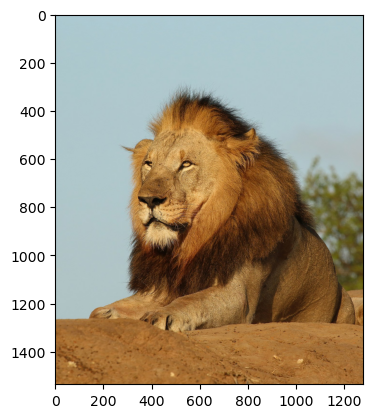

In [134]:
img = Image.open('1280px-Lion_(Panthera_leo)_male_6y.jpg')
_ = plt.imshow(img)

Convert image to grayscale so that we don't have to deal with the complexity of multiple color channels: 

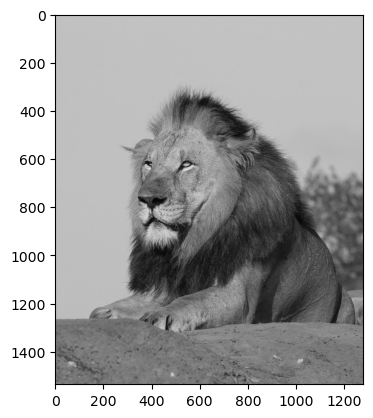

In [135]:
imggray = img.convert('LA')
_ = plt.imshow(imggray)

Convert data into numpy matrix, which doesn't impact image data: 

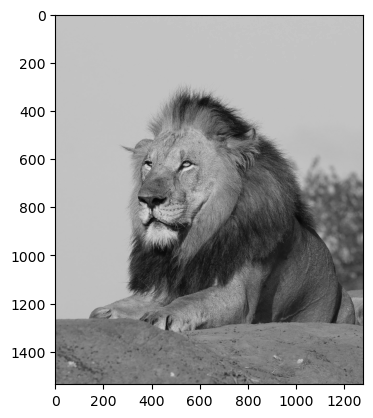

In [136]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
_ = plt.imshow(imgmat, cmap='gray')

Calculate SVD of the image: Calculate SVD of the image: 

In [137]:
U, sigma, V = np.linalg.svd(imgmat)

As eigenvalues are arranged in descending order in diag($\lambda$) so too are singular values, by convention, arranged in descending order in $\Delta$ (or, in this code, diag($\sigma$)). Thus, the first left-singular vector of $L$ and first right-singular vector of $R$ may represent the most prominent feature of the image: 

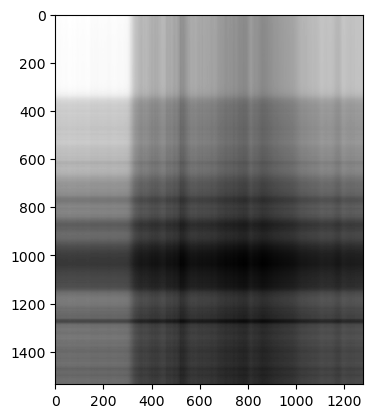

In [138]:
reconstimg = np.matrix(U[:, :1]) * np.diag(sigma[:1]) * np.matrix(V[:1, :])
_ = plt.imshow(reconstimg, cmap='gray')

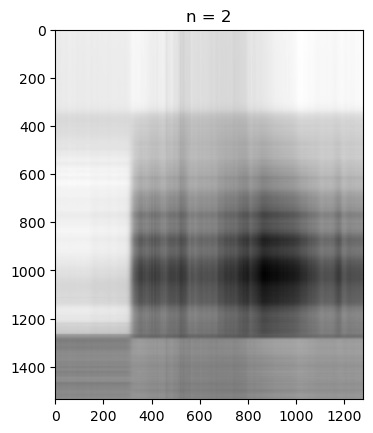

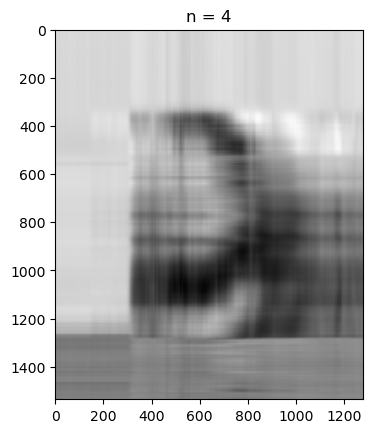

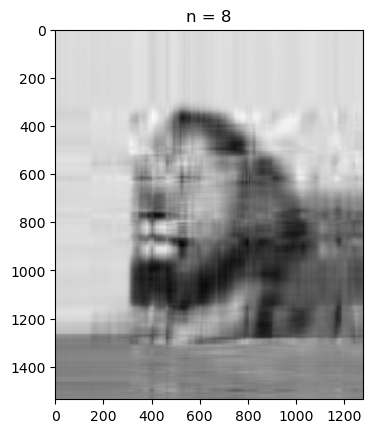

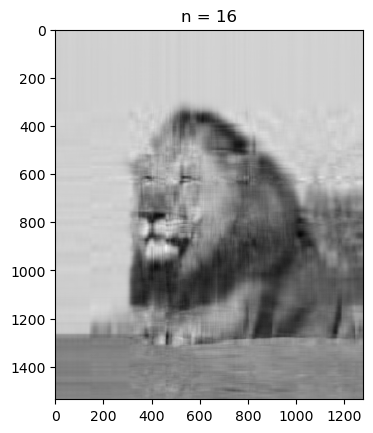

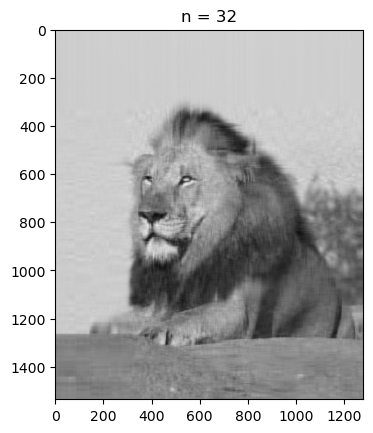

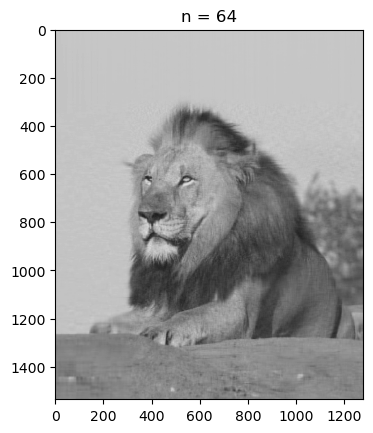

In [139]:
for i in [2, 4, 8, 16, 32, 64]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

With 32 singular vectors, the image is reconstructed quite well, however the data footprint is much smaller than the original image:

In [146]:
imgmat.shape

(1536, 1280)

In [147]:
full_representation = 1536*1280
full_representation

1966080

In [148]:
svd32_rep = 32*1536 + 32 + 32*1280
svd32_rep

90144

In [149]:
svd64_rep/full_representation

0.045849609375

Specifically, the image represented as 32 singular vectors is 4.5% of the size of the original! 

Alongside images, we can use singular vectors for dramatic, lossy compression of other types of media files.

### Principal Component Analysis

In [151]:
from sklearn import datasets
iris = datasets.load_iris()

In [152]:
iris.data.shape

(150, 4)

In [153]:
iris.get("feature_names")

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [154]:
iris.data[0:6,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [155]:
from sklearn.decomposition import PCA

In [156]:
pca = PCA(n_components=2)

In [157]:
X = pca.fit_transform(iris.data)

In [158]:
X.shape

(150, 2)

In [159]:
X[0:6,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045]])

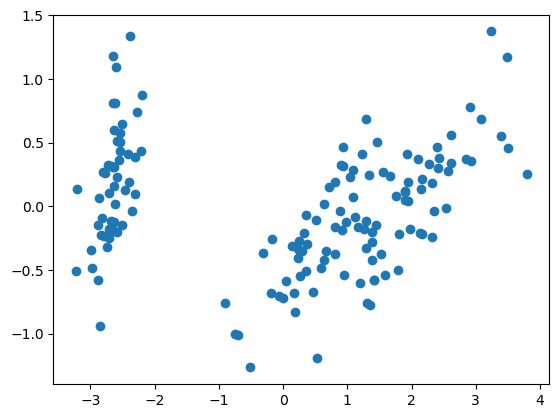

In [160]:
_ = plt.scatter(X[:, 0], X[:, 1])

In [161]:
iris.target.shape

(150,)

In [162]:
iris.target[0:6]

array([0, 0, 0, 0, 0, 0])

In [163]:
unique_elements, counts_elements = np.unique(iris.target, return_counts=True)
np.asarray((unique_elements, counts_elements))

array([[ 0,  1,  2],
       [50, 50, 50]])

In [164]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

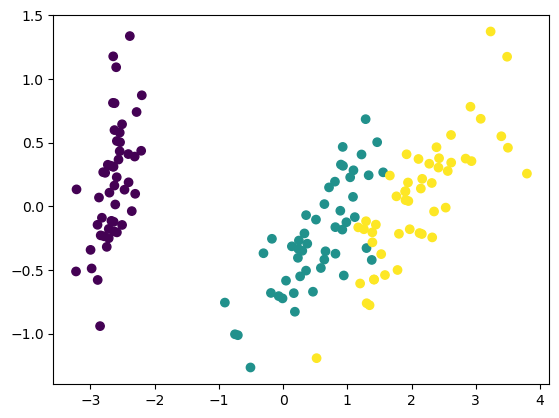

In [165]:
_ = plt.scatter(X[:, 0], X[:, 1], c=iris.target)